In [44]:
import pandas as pd
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data',names=cols)
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


In [45]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

In [46]:
print(cars.isnull().sum())

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [47]:
#Select numeric columns only
import numpy as np
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]
numeric_cars = numeric_cars.replace('?',np.nan)
print(numeric_cars.isnull().sum())

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [48]:
#As i do not consider the normalized-losses column valuable i will drop it from the project
numeric_cars = numeric_cars.drop('normalized-losses',axis=1)


In [49]:
#As we are building a model to predict a car's market price i will delete any rows
#in the price column with nan values
colprice = numeric_cars['price']
numeric_cars = numeric_cars.dropna(subset=['price'])
print(numeric_cars.isnull().sum())
numeric_cars.info()

wheel-base          0
length              0
width               0
height              0
curb-weight         0
bore                4
stroke              4
compression-rate    0
horsepower          2
peak-rpm            2
city-mpg            0
highway-mpg         0
price               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 13 columns):
wheel-base          201 non-null float64
length              201 non-null float64
width               201 non-null float64
height              201 non-null float64
curb-weight         201 non-null int64
bore                197 non-null object
stroke              197 non-null object
compression-rate    201 non-null float64
horsepower          199 non-null object
peak-rpm            199 non-null object
city-mpg            201 non-null int64
highway-mpg         201 non-null int64
price               201 non-null object
dtypes: float64(5), int64(3), object(5)
memory usage: 22.0+ KB


In [50]:
#I will replace the nan values from all the columns with the mean of the column
numeric_cars = numeric_cars.astype('float')
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 13 columns):
wheel-base          201 non-null float64
length              201 non-null float64
width               201 non-null float64
height              201 non-null float64
curb-weight         201 non-null float64
bore                201 non-null float64
stroke              201 non-null float64
compression-rate    201 non-null float64
horsepower          201 non-null float64
peak-rpm            201 non-null float64
city-mpg            201 non-null float64
highway-mpg         201 non-null float64
price               201 non-null float64
dtypes: float64(13)
memory usage: 22.0 KB


In [51]:
print(numeric_cars.head())

   wheel-base  length  width  height  curb-weight  bore  stroke  \
0        88.6   168.8   64.1    48.8       2548.0  3.47    2.68   
1        88.6   168.8   64.1    48.8       2548.0  3.47    2.68   
2        94.5   171.2   65.5    52.4       2823.0  2.68    3.47   
3        99.8   176.6   66.2    54.3       2337.0  3.19    3.40   
4        99.4   176.6   66.4    54.3       2824.0  3.19    3.40   

   compression-rate  horsepower  peak-rpm  city-mpg  highway-mpg    price  
0               9.0       111.0    5000.0      21.0         27.0  13495.0  
1               9.0       111.0    5000.0      21.0         27.0  16500.0  
2               9.0       154.0    5000.0      19.0         26.0  16500.0  
3              10.0       102.0    5500.0      24.0         30.0  13950.0  
4               8.0       115.0    5500.0      18.0         22.0  17450.0  


In [52]:
#Normalizing columns but not price
def normcol(series):
    maxs = max(series)
    series = series/maxs
    return series
cols = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore',
       'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg']
for i in cols:
    numeric_cars[i] = normcol(numeric_cars[i])
print(numeric_cars.head())    

   wheel-base    length     width    height  curb-weight      bore    stroke  \
0    0.732837  0.811148  0.890278  0.816054     0.626660  0.880711  0.642686   
1    0.732837  0.811148  0.890278  0.816054     0.626660  0.880711  0.642686   
2    0.781638  0.822681  0.909722  0.876254     0.694294  0.680203  0.832134   
3    0.825476  0.848630  0.919444  0.908027     0.574766  0.809645  0.815348   
4    0.822167  0.848630  0.922222  0.908027     0.694540  0.809645  0.815348   

   compression-rate  horsepower  peak-rpm  city-mpg  highway-mpg    price  
0          0.391304    0.423664  0.757576  0.428571     0.500000  13495.0  
1          0.391304    0.423664  0.757576  0.428571     0.500000  16500.0  
2          0.391304    0.587786  0.757576  0.387755     0.481481  16500.0  
3          0.434783    0.389313  0.833333  0.489796     0.555556  13950.0  
4          0.347826    0.438931  0.833333  0.367347     0.407407  17450.0  


In [53]:
# As the dataframe has 201 rows I would split the df 150 rows for train df

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col,target_col,df):
    #randomizing the rows in the df
    np.random.seed(1)
    random_df = df.iloc[np.random.permutation(len(numeric_cars))]
    #splittin the df 75% train_df
    lasttrain = int((len(numeric_cars)*2)/3)
    train_df = random_df.iloc[0:lasttrain]
    test_df = random_df.iloc[lasttrain:]
    knn = KNeighborsRegressor(algorithm='brute')
    knn.fit(train_df[train_col],train_df[target_col])
    predictions = knn.predict(test_df[train_col])
    mse = mean_squared_error(test_df[target_col],predictions)
    return mse**0.5
#list comprehension
rmse_all = [knn_train_test([i],'price',numeric_cars) for i in cols]
print(rmse_all) 
#dictionary
rmse_results ={}
for i in cols:
    rmse_val = knn_train_test([i], 'price', numeric_cars)
    rmse_results[i] = rmse_val
print(rmse_results)
    


[5177.9206983314216, 5158.3813297664983, 4895.8729669038285, 7720.5959172600096, 4888.8402619502376, 7631.2706076096638, 7515.136246349366, 5871.3426554165135, 4373.4250654361358, 7450.536755541284, 4971.8965562419089, 4921.4339984595981]
{'width': 4895.8729669038285, 'stroke': 7515.136246349366, 'compression-rate': 5871.3426554165135, 'peak-rpm': 7450.536755541284, 'bore': 7631.2706076096638, 'horsepower': 4373.4250654361358, 'length': 5158.3813297664983, 'highway-mpg': 4921.4339984595981, 'curb-weight': 4888.8402619502376, 'height': 7720.5959172600096, 'wheel-base': 5177.9206983314216, 'city-mpg': 4971.8965562419089}


In [54]:
#Adding k to the function
def knn_train_test(train_col,target_col,df):
    #randomizing the rows in the df
    np.random.seed(1)
    random_df = df.iloc[np.random.permutation(len(numeric_cars))]
    #splittin the df 75% train_df
    lasttrain = int((len(numeric_cars)*2)/3)
    train_df = random_df.iloc[0:lasttrain]
    test_df = random_df.iloc[lasttrain:]
    #adding k
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])
        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])
        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses


cols = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore',
       'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg']
difk_rmse = {}
for c in cols:
    val = knn_train_test(c,'price',numeric_cars)
    difk_rmse[c] = val
    
difk_rmse       

{'bore': {1: 11692.85503547346,
  3: 7780.2309838796382,
  5: 7627.3104295848425,
  7: 7791.6766671499972,
  9: 7807.3918950370526},
 'city-mpg': {1: 5266.0728209191984,
  3: 4999.5369873513146,
  5: 4672.2340806596594,
  7: 4518.7295799541907,
  9: 5063.709168942486},
 'compression-rate': {1: 8220.6528765310304,
  3: 5637.9287342902198,
  5: 5750.3836288378161,
  7: 5675.152235368545,
  9: 6160.5834416725074},
 'curb-weight': {1: 5803.2606081897757,
  3: 5705.2141260324834,
  5: 4811.3904581623301,
  7: 4676.6712882572783,
  9: 4719.0427713190129},
 'height': {1: 8801.8273001062407,
  3: 7835.1221471882527,
  5: 7572.1846582020471,
  7: 7665.8517053795094,
  9: 7755.1123190377994},
 'highway-mpg': {1: 5402.232914516605,
  3: 4892.2169883765246,
  5: 5037.1839149306252,
  7: 5217.487192482231,
  9: 5343.2298228110294},
 'horsepower': {1: 3635.4582888749055,
  3: 4168.9691123069997,
  5: 4356.952348438891,
  7: 4355.5933814858263,
  9: 4695.5616745268144},
 'length': {1: 5402.3447645650

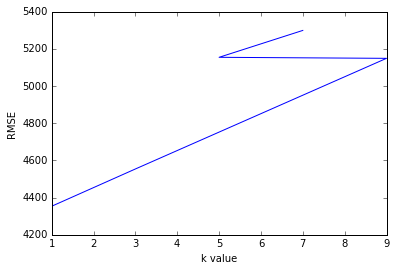

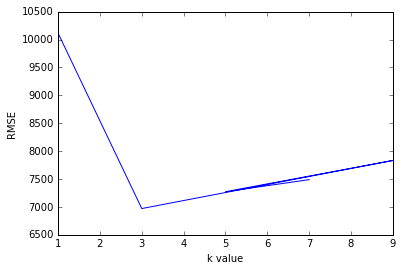

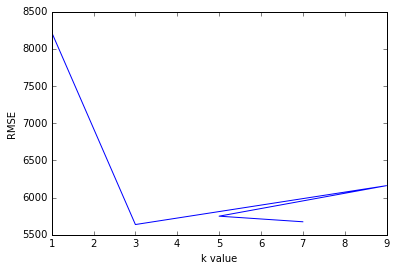

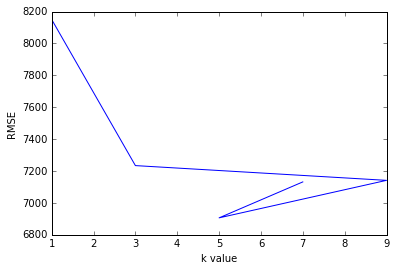

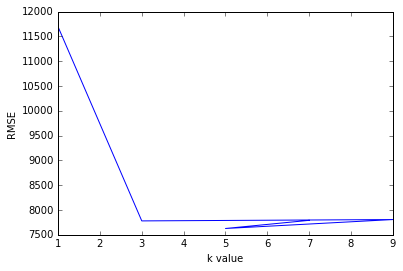

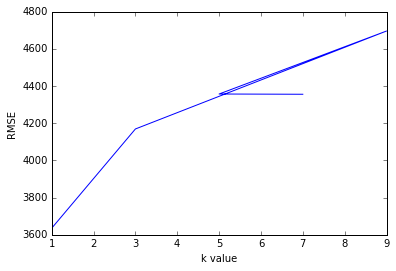

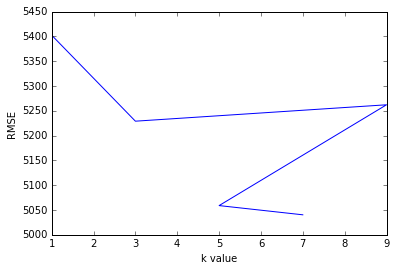

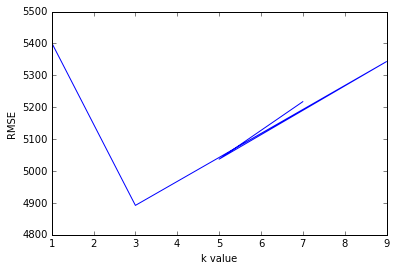

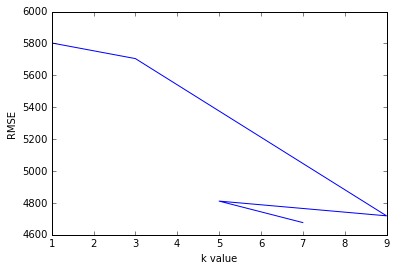

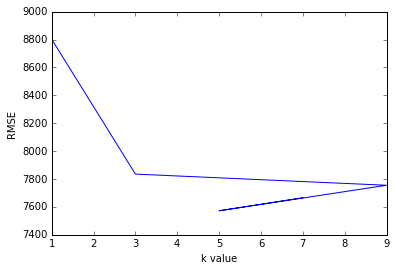

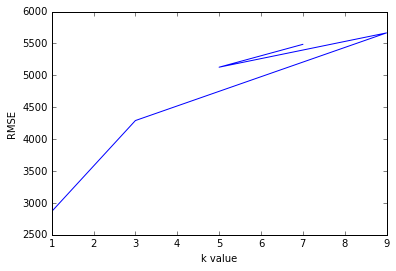

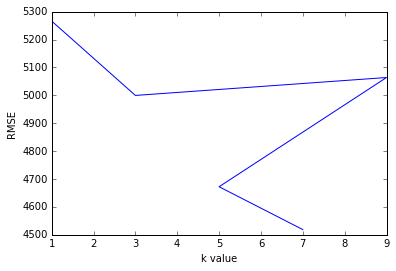

In [55]:
#plottin results
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in difk_rmse.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.show()

In [56]:
# Accept a list of column names (instead of just a string)
#  Get the std of ea dictionary to get the best features
dictstd = {}
for c in cols:
    val = knn_train_test(c,'price',numeric_cars)
    stdv = sum(val.values())/len(val)
    dictstd[c] = stdv
dictstd = sorted(dictstd.items(), key=lambda x: x[1])
dictstd

[('horsepower', 4242.5069611266872),
 ('wheel-base', 4687.437969106637),
 ('width', 4901.8699397933424),
 ('city-mpg', 4904.0565275653698),
 ('curb-weight', 5143.1158503921761),
 ('highway-mpg', 5178.4701666234032),
 ('length', 5198.5489253118012),
 ('compression-rate', 6288.9401833400234),
 ('peak-rpm', 7312.7999999514695),
 ('height', 7926.0196259827699),
 ('stroke', 7935.3927383206756),
 ('bore', 8539.8930022249988)]

In [57]:
#As per the results above, I will start my analisis below:
#function to get the best as per k
def bestk(k):
    best = []
    for i,v in enumerate(dictstd):
        if i < k:
            best.append(v[0])
    return best
k_best =[]
k_lst = [2,3,4,5]
for k in k_lst:
    best = bestk(k)
    k_best.append(best)    
print(k_best)  
    

[['horsepower', 'wheel-base'], ['horsepower', 'wheel-base', 'width'], ['horsepower', 'wheel-base', 'width', 'city-mpg'], ['horsepower', 'wheel-base', 'width', 'city-mpg', 'curb-weight']]


In [58]:
#Modifying the knn function
def knn_train_test(best_col,target_col,df):
    #randomizing the rows in the df
    np.random.seed(1)
    random_df = df.iloc[np.random.permutation(len(numeric_cars))]
    #splittin the df 75% train_df
    lasttrain = int((len(numeric_cars)*2)/3)
    train_df = random_df.iloc[0:lasttrain]
    test_df = random_df.iloc[lasttrain:]
    knn = KNeighborsRegressor(algorithm='brute')
    knn.fit(train_df[best_col],train_df[target_col])
    predictions = knn.predict(test_df[best_col])
    mse = mean_squared_error(test_df[target_col],predictions)
    return mse**0.5
bestk_dic = {}

for k in k_best:
    best = knn_train_test(k,'price',numeric_cars)
    bestk_dic[str(k)] = best  #convert list to string as it has two values and cannot be hashed
bestk_dic    


{"['horsepower', 'wheel-base', 'width', 'city-mpg', 'curb-weight']": 3567.4798195205767,
 "['horsepower', 'wheel-base', 'width', 'city-mpg']": 3385.7252853797368,
 "['horsepower', 'wheel-base', 'width']": 3662.0448843406293,
 "['horsepower', 'wheel-base']": 3805.2067479477205}

As per results the best combination of features for 5 "neighbors" so far is the best 4 combination -  'horsepower', 'wheel-base', 'width', 'city-mpg'

In [59]:
#For the top 3 models in the last step, vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values
bestk_lst = sorted(bestk_dic.items(), key=lambda x: x[1])
bestk_lst

[("['horsepower', 'wheel-base', 'width', 'city-mpg']", 3385.7252853797368),
 ("['horsepower', 'wheel-base', 'width', 'city-mpg', 'curb-weight']",
  3567.4798195205767),
 ("['horsepower', 'wheel-base', 'width']", 3662.0448843406293),
 ("['horsepower', 'wheel-base']", 3805.2067479477205)]

In [60]:
best3 =[]
for i,b in enumerate(bestk_dic):
    if i < 3:
        best3.append(b)
print(best3)    

["['horsepower', 'wheel-base', 'width', 'city-mpg']", "['horsepower', 'wheel-base']", "['horsepower', 'wheel-base', 'width']"]


In [61]:
#For the top 3 models in the last step, vary the hyperparameter value from 
#1 to 25 and plot the resulting RMSE values.
def knn_train_test(best,target_col,df):
    #randomizing the rows in the df
    np.random.seed(1)
    random_df = df.iloc[np.random.permutation(len(numeric_cars))]
    #splittin the df 75% train_df
    lasttrain = int((len(numeric_cars)*2)/3)
    train_df = random_df.iloc[0:lasttrain]
    test_df = random_df.iloc[lasttrain:]
    
    k_rmses = {}
    
    for k in range(1,25):
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[best], train_df[target_col])
        # Make predictions using model.
        predicted_labels = knn.predict(test_df[best])
        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses
k_best25 = {}
best1 = ['horsepower', 'wheel-base', 'width', 'city-mpg']
k_best25["best1"] = knn_train_test(best1,'price',numeric_cars)
best2 = ['horsepower', 'wheel-base', 'width', 'city-mpg', 'curb-weight']
k_best25["best2"] = knn_train_test(best2,'price',numeric_cars)
best3 = ['horsepower', 'wheel-base', 'width']
k_best25["best3"] = knn_train_test(best3,'price',numeric_cars)
k_best25

{'best1': {1: 2585.1958931520353,
  2: 2590.5674542606735,
  3: 3242.1969912416776,
  4: 3434.3600171810672,
  5: 3430.8423555530376,
  6: 3630.0815777031016,
  7: 3953.3683558057123,
  8: 4109.1690519018821,
  9: 4197.2091757202579,
  10: 4399.1274504071116,
  11: 4489.9072330771041,
  12: 4676.2264698367089,
  13: 4804.8854603165573,
  14: 4818.1653172833903,
  15: 4914.8086127437864,
  16: 4997.1365187543715,
  17: 4963.3715289051443,
  18: 4930.6055631453692,
  19: 4954.9167088999857,
  20: 4959.183848901097,
  21: 4987.9715294336966,
  22: 5048.441438625664,
  23: 5116.1026744004812,
  24: 5143.8621271749844},
 'best2': {1: 2504.8765662084625,
  2: 2181.3579554604848,
  3: 2978.425830790331,
  4: 3190.5356729861237,
  5: 3563.5401264523207,
  6: 3735.6651967583998,
  7: 3987.5811895461975,
  8: 4244.3637781804055,
  9: 4379.591338939289,
  10: 4539.6718978029121,
  11: 4546.0288323238474,
  12: 4649.8414728166672,
  13: 4752.4289724626678,
  14: 4872.0398440337049,
  15: 4871.3031

In [62]:
best1d = k_best25.get('best1')
best1d = sorted(best1d.items(), key=lambda x: x[1])

best2d = k_best25.get('best2')
best2d = sorted(best2d.items(), key=lambda x: x[1])

best3d = k_best25.get('best3')
best3d = sorted(best3d.items(), key=lambda x: x[1])
print('best1d',best1d)
print('best2d',best2d)
print('best3d',best3d)
#Another way
bestl = ['best1', 'best2', 'best3']
for b in bestl:
    d = k_best25.get(b)
    d = sorted(d.items(), key=lambda x: x[1])
    print(d)


best1d [(1, 2585.1958931520353), (2, 2590.5674542606735), (3, 3242.1969912416776), (5, 3430.8423555530376), (4, 3434.3600171810672), (6, 3630.0815777031016), (7, 3953.3683558057123), (8, 4109.1690519018821), (9, 4197.2091757202579), (10, 4399.1274504071116), (11, 4489.9072330771041), (12, 4676.2264698367089), (13, 4804.8854603165573), (14, 4818.1653172833903), (15, 4914.8086127437864), (18, 4930.6055631453692), (19, 4954.9167088999857), (20, 4959.183848901097), (17, 4963.3715289051443), (21, 4987.9715294336966), (16, 4997.1365187543715), (22, 5048.441438625664), (23, 5116.1026744004812), (24, 5143.8621271749844)]
best2d [(2, 2181.3579554604848), (1, 2504.8765662084625), (3, 2978.425830790331), (4, 3190.5356729861237), (5, 3563.5401264523207), (6, 3735.6651967583998), (7, 3987.5811895461975), (8, 4244.3637781804055), (9, 4379.591338939289), (10, 4539.6718978029121), (11, 4546.0288323238474), (12, 4649.8414728166672), (13, 4752.4289724626678), (15, 4871.3031106900853), (14, 4872.03984403

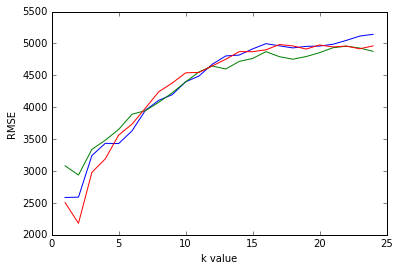

In [63]:
#plotting the results
for k,v in k_best25.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
plt.show()    


As per results for model with features ['horsepower', 'wheel-base', 'width', 'city-mpg'] the best k value is 1, and for the others is 2.  All the rmses increase as k value is increased.  As you increase the number of "neighbors" the variance increases and as a result the rmse increases too.

In [76]:
#first way - Using a for loop
for fold in range(2,20):
    kf = KFold(fold, shuffle=True, random_state=1)
    model = KNeighborsRegressor()
    mses = cross_val_score(model, numeric_cars[["horsepower"]], numeric_cars["price"], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    print(str(fold), "folds: ", "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse))
 
#Using a function
def kfold(feat):
    foldbest = {}
    for i in range(2,10):
        kf = KFold(i, shuffle=True, random_state=1)
        model = KNeighborsRegressor()
        mses = cross_val_score(model, numeric_cars[[feat]], numeric_cars["price"], scoring="neg_mean_squared_error", cv=kf)
        rmses = np.sqrt(np.absolute(mses))
        avg_rmse = np.mean(rmses)
        std_rmse = np.std(rmses)
        foldbest[i] = rmses
    return foldbest
horsepmean = {}
horsepstd = {}
horsepower = kfold('horsepower') 
for k,v in horsepower.items():
    horsepmean[k] = np.mean(v)
    horsepstd[k] = np.std(v)
#Calculating the mean of the stdv per fold, and the std of the std per fold
print("horsepower fold mean",horsepmean)
print("horsepower fold standard dev", horsepstd)


2 folds:  avg RMSE:  3903.99673757 std RMSE:  84.2416748159
3 folds:  avg RMSE:  3818.40600904 std RMSE:  429.260605386
4 folds:  avg RMSE:  3772.10325256 std RMSE:  832.764500195
5 folds:  avg RMSE:  3737.15895685 std RMSE:  821.630909961
6 folds:  avg RMSE:  3746.66891651 std RMSE:  1001.52035571
7 folds:  avg RMSE:  3697.75715326 std RMSE:  907.182231128
8 folds:  avg RMSE:  3815.87126345 std RMSE:  1049.70988286
9 folds:  avg RMSE:  3699.40769526 std RMSE:  1070.05670416
10 folds:  avg RMSE:  3709.99323704 std RMSE:  1000.04799494
11 folds:  avg RMSE:  3494.59486996 std RMSE:  1309.3942054
12 folds:  avg RMSE:  3718.51703944 std RMSE:  1148.97573763
13 folds:  avg RMSE:  3657.14170229 std RMSE:  1300.18046719
14 folds:  avg RMSE:  3600.01560734 std RMSE:  1303.19525184
15 folds:  avg RMSE:  3621.14310984 std RMSE:  1373.99411523
16 folds:  avg RMSE:  3648.4819461 std RMSE:  1377.81717381
17 folds:  avg RMSE:  3601.04666355 std RMSE:  1459.0091015
18 folds:  avg RMSE:  3524.76291237

In [79]:
#Applying formula to "stroke"
stroke = kfold('stroke') 
print(stroke)
strokemean = {}
strokestd = {}
for k,v in stroke.items():
    strokemean[k] = np.mean(v)
    strokestd[k] = np.std(v)
#Calculating the mean of the stdv per fold, and the std of the std per fold
print("horsepower fold mean",strokemean)
print("horsepower fold standard dev", strokestd)

{2: array([ 7924.81904259,  7735.79617467]), 3: array([ 6895.76964895,  7594.26470987,  7539.608806  ]), 4: array([ 7104.3291533 ,  7517.44415109,  7979.32656146,  6819.67580895]), 5: array([ 6020.44571748,  6711.06492779,  8025.0846284 ,  8089.09728017,
        6361.94052291]), 6: array([ 7147.82292853,  7410.04770851,  8499.81401402,  8128.54674253,
        7435.71221744,  7484.58127012]), 7: array([ 6860.14777633,  6174.60210585,  7162.0640063 ,  7712.41026541,
        6659.3244718 ,  7495.01501018,  8124.20258795]), 8: array([ 7143.67612335,  5898.96187708,  6256.5517125 ,  8757.89456196,
        7789.88475211,  8721.34858563,  7023.42242808,  8195.9650171 ]), 9: array([ 7262.50027446,  6497.2471827 ,  6678.93001428,  7485.77655035,
        7732.98223456,  7265.96432967,  7822.7653605 ,  8312.36367292,
        7944.00696317])}
horsepower fold mean {2: 7830.3076086295187, 3: 7343.2143882714545, 4: 7355.193918700842, 5: 7041.5266153478369, 6: 7684.4208135254303, 7: 7169.6808891170303